In [15]:


import requests
import yaml
import json
import pandas as pd
import os

RESULTS_DIR = os.path.join(os.getcwd(), 'results')
QUERIES_DIR = os.path.join(os.getcwd(), 'queries')

##############################################################################################################################
# Toggle the below boolean to change whether the program fetches queries (false) or loads pre-fetched data (true)
LOAD_FROM_FILE = True
##############################################################################################################################

with open('api.yaml', 'r') as f:
    parsed_yaml = yaml.load(f, Loader=yaml.FullLoader)
    API_KEY = parsed_yaml['api']

def run_query(query):  # A simple function to use requests.post to make the API call.
    headers = {'X-API-KEY': 'API_KEY'}
    request = requests.post('https://graphql.bitquery.io/', json={'query': query, 'variables': variables},
                            headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed and return code is {}.      {}'.format(request.status_code, query))


def write_json_to_file(json_obj, file):
    with open(file, 'w') as f_out:
        json.dump(json_obj, f_out)


def load_json_from_file(file):
    with open(file, 'r') as f_in:
        json_obj = json.load(f_in)
    return json_ob

#### The first query fetches the number of decentralized exchange trades in the Ethereum chain

In [20]:
variables = {
  "limit": 10,
  "offset": 0,
  "network": "ethereum",
  "from": "2021-01-01",
  "till": "2022-05-24T23:59:59",
  "dateFormat": "%Y-%m"
}
query1 = """
query ($network: EthereumNetwork!, $dateFormat: String!, $from: ISO8601DateTime, $till: ISO8601DateTime) {
  ethereum(network: $network) {
    dexTrades(options: {asc: "date.date"}, date: {since: $from, till: $till}) {
      date: date {
        date(format: $dateFormat)
      }
      trades: countBigInt
      traders: countBigInt(uniq: takers)
      contracts: countBigInt(uniq: smart_contracts)
      currencies: countBigInt(uniq: buy_currency)
    }
  }
}
"""

if not LOAD_FROM_FILE:
    result1 = run_query(query1)  # Execute the query
    write_json_to_file(result1, os.path.join(QUERIES_DIR, 'query4.json'))
else:
    result1 = load_json_from_file(os.path.join(QUERIES_DIR, 'query4.json'))

print('Result - {}'.format(result1))

Result - {'data': {'ethereum': {'dexTrades': [{'date': {'date': '2021-01'}, 'trades': '5178531', 'traders': '299035', 'contracts': '8845', 'currencies': '4976'}, {'date': {'date': '2021-02'}, 'trades': '5095820', 'traders': '347426', 'contracts': '7370', 'currencies': '3857'}, {'date': {'date': '2021-03'}, 'trades': '5900288', 'traders': '456066', 'contracts': '8283', 'currencies': '4467'}, {'date': {'date': '2021-04'}, 'trades': '6140761', 'traders': '577350', 'contracts': '10491', 'currencies': '5695'}, {'date': {'date': '2021-05'}, 'trades': '7878549', 'traders': '875727', 'contracts': '14262', 'currencies': '7843'}, {'date': {'date': '2021-06'}, 'trades': '6781814', 'traders': '563194', 'contracts': '17990', 'currencies': '9902'}, {'date': {'date': '2021-07'}, 'trades': '5984810', 'traders': '492503', 'contracts': '15157', 'currencies': '8687'}, {'date': {'date': '2021-08'}, 'trades': '4797165', 'traders': '438673', 'contracts': '11957', 'currencies': '6726'}, {'date': {'date': '20

In [41]:
# Convert the result to a dataframe
df1 = pd.json_normalize(result['data']['ethereum']['dexTrades'])
df1.head(17)

,trades,traders,contracts,currencies,date.date
0,5178531,299035,8845,4976,2021-01
1,5095820,347426,7370,3857,2021-02
2,5900288,456066,8283,4467,2021-03
3,6140761,577350,10491,5695,2021-04
4,7878549,875727,14262,7843,2021-05
5,6781814,563194,17990,9902,2021-06
6,5984810,492503,15157,8687,2021-07
7,4797165,438673,11957,6726,2021-08
8,3821140,396659,10554,5864,2021-09
9,4974685,617230,11314,6494,2021-10


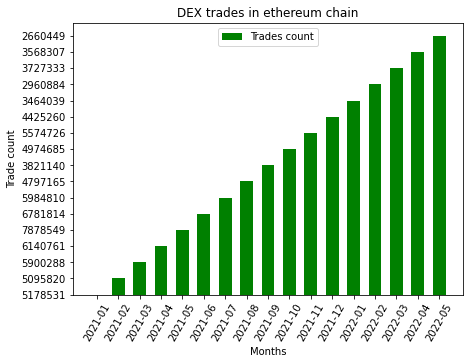

In [111]:

import matplotlib.pyplot as plt

trades = df1["trades"]
date = df1["date.date"]

fig = plt.figure(figsize = (7, 5))
plt.bar(date, trades, color ='green',
        width = 0.6, label = "Trades count")

plt.xticks(rotation=60)
plt.xlabel("Months")
plt.ylabel("Trade count")
plt.title("DEX trades in ethereum chain")
plt.legend(loc= "upper center")
plt.show()

#### This query fetches the DEX trades in the Binance chain

In [112]:
variable = {
  "limit": 10,
  "offset": 0,
  "network": "bsc",
  "from": "2021-01-01",
  "till": "2022-05-24T23:59:59",
  "dateFormat": "%Y-%m"
}
query2 = """
query ($network: EthereumNetwork!, $dateFormat: String!, $from: ISO8601DateTime, $till: ISO8601DateTime) {
  ethereum(network: $network) {
    dexTrades(options: {asc: "date.date"}, date: {since: $from, till: $till}) {
      date: date {
        date(format: $dateFormat)
      }
      trades: countBigInt
      traders: countBigInt(uniq: takers)
      contracts: countBigInt(uniq: smart_contracts)
      currencies: countBigInt(uniq: buy_currency)
    }
  }
}
"""
#if not LOAD_FROM_FILE:
result1 = run_query(query1)  # Execute the query
#    write_json_to_file(result1, os.path.join(QUERIES_DIR, 'query4.json'))
#else:
 #   result1 = load_json_from_file(os.path.join(QUERIES_DIR, 'query4.json'))

print('Result - {}'.format(result1))

Result - {'data': {'ethereum': {'dexTrades': [{'date': {'date': '2021-01'}, 'trades': '5178531', 'traders': '299035', 'contracts': '8845', 'currencies': '4976'}, {'date': {'date': '2021-02'}, 'trades': '5095820', 'traders': '347426', 'contracts': '7370', 'currencies': '3857'}, {'date': {'date': '2021-03'}, 'trades': '5900288', 'traders': '456066', 'contracts': '8283', 'currencies': '4467'}, {'date': {'date': '2021-04'}, 'trades': '6140761', 'traders': '577350', 'contracts': '10491', 'currencies': '5695'}, {'date': {'date': '2021-05'}, 'trades': '7878549', 'traders': '875727', 'contracts': '14262', 'currencies': '7843'}, {'date': {'date': '2021-06'}, 'trades': '6781814', 'traders': '563194', 'contracts': '17990', 'currencies': '9902'}, {'date': {'date': '2021-07'}, 'trades': '5984810', 'traders': '492503', 'contracts': '15157', 'currencies': '8687'}, {'date': {'date': '2021-08'}, 'trades': '4797165', 'traders': '438673', 'contracts': '11957', 'currencies': '6726'}, {'date': {'date': '20

In [115]:
# Convert the result to a dataframe
df2 = pd.json_normalize(result['data']['ethereum']['dexTrades'])
df2.head(17)

,trades,traders,contracts,currencies,date.date
0,5178531,299035,8845,4976,2021-01
1,5095820,347426,7370,3857,2021-02
2,5900288,456066,8283,4467,2021-03
3,6140761,577350,10491,5695,2021-04
4,7878549,875727,14262,7843,2021-05
5,6781814,563194,17990,9902,2021-06
6,5984810,492503,15157,8687,2021-07
7,4797165,438673,11957,6726,2021-08
8,3821140,396659,10554,5864,2021-09
9,4974685,617230,11314,6494,2021-10


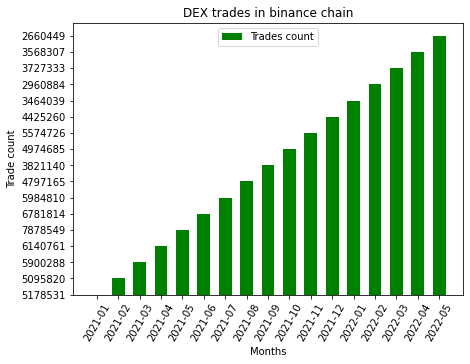

In [116]:

import matplotlib.pyplot as plt

trades = df2["trades"]
date = df2["date.date"]

fig = plt.figure(figsize = (7, 5))
plt.bar(date, trades, color ='green',
        width = 0.6, label = "Trades count")

plt.xticks(rotation=60)
plt.xlabel("Months")
plt.ylabel("Trade count")
plt.title("DEX trades in binance chain")
plt.legend(loc= "upper center")
plt.show()